In [148]:
import matplotlib.pyplot as plt
%matplotlib inline

dir = "C:\\Workspace\\AiHackathon\\"

In [149]:
# Errors
import numpy as np

def ae(actual, predicted):
    """
    Computes the absolute error.

    This function computes the absolute error between two numbers,
    or for element between a pair of lists or numpy arrays.

    Parameters
    ----------
    actual : int, float, list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value

    Returns
    -------
    score : double or list of doubles
            The absolute error between actual and predicted

    """
    return np.abs(np.array(actual)-np.array(predicted))

def ce(actual, predicted):
    """
    Computes the classification error.

    This function computes the classification error between two lists

    Parameters
    ----------
    actual : list
             A list of the true classes
    predicted : list
                A list of the predicted classes

    Returns
    -------
    score : double
            The classification error between actual and predicted

    """
    return (sum([1.0 for x,y in zip(actual,predicted) if x != y]) /
            len(actual))

def mae(actual, predicted):
    """
    Computes the mean absolute error.

    This function computes the mean absolute error between two lists
    of numbers.

    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value

    Returns
    -------
    score : double
            The mean absolute error between actual and predicted

    """
    return np.mean(ae(actual, predicted))

def mse(actual, predicted):
    """
    Computes the mean squared error.

    This function computes the mean squared error between two lists
    of numbers.

    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value

    Returns
    -------
    score : double
            The mean squared error between actual and predicted

    """
    return np.mean(se(actual, predicted))

def msle(actual, predicted):
    """
    Computes the mean squared log error.

    This function computes the mean squared log error between two lists
    of numbers.

    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value

    Returns
    -------
    score : double
            The mean squared log error between actual and predicted

    """
    return np.mean(sle(actual, predicted))

def rmse(actual, predicted):
    """
    Computes the root mean squared error.

    This function computes the root mean squared error between two lists
    of numbers.

    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value

    Returns
    -------
    score : double
            The root mean squared error between actual and predicted

    """
    return np.sqrt(mse(actual, predicted))

def rmsle(actual, predicted):
    """
    Computes the root mean squared log error.

    This function computes the root mean squared log error between two lists
    of numbers.

    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value

    Returns
    -------
    score : double
            The root mean squared log error between actual and predicted

    """
    return np.sqrt(msle(actual, predicted))

def se(actual, predicted):
    """
    Computes the squared error.

    This function computes the squared error between two numbers,
    or for element between a pair of lists or numpy arrays.

    Parameters
    ----------
    actual : int, float, list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value

    Returns
    -------
    score : double or list of doubles
            The squared error between actual and predicted

    """
    return np.power(np.array(actual)-np.array(predicted), 2)

def sle(actual, predicted):
    """
    Computes the squared log error.

    This function computes the squared log error between two numbers,
    or for element between a pair of lists or numpy arrays.

    Parameters
    ----------
    actual : int, float, list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value

    Returns
    -------
    score : double or list of doubles
            The squared log error between actual and predicted

    """
    return (np.power(np.log(np.array(actual)+1) -
            np.log(np.array(predicted)+1), 2))

def ll(actual, predicted):
    """
    Computes the log likelihood.

    This function computes the log likelihood between two numbers,
    or for element between a pair of lists or numpy arrays.

    Parameters
    ----------
    actual : int, float, list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value

    Returns
    -------
    score : double or list of doubles
            The log likelihood error between actual and predicted

    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    err = np.seterr(all='ignore')
    score = -(actual*np.log(predicted)+(1-actual)*np.log(1-predicted))
    np.seterr(divide=err['divide'], over=err['over'],
              under=err['under'], invalid=err['invalid'])
    if type(score)==np.ndarray:
        score[np.isnan(score)] = 0
    else:
        if np.isnan(score):
            score = 0
    return score

def log_loss(actual, predicted):
    """
    Computes the log loss.

    This function computes the log loss between two lists
    of numbers.

    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value

    Returns
    -------
    score : double
            The log loss between actual and predicted

    """
    return np.mean(ll(actual, predicted))

In [150]:
import numpy
import pandas as pd

tickers_dict_r_min = {}
tickers_dict_r_max = {}
tickers_dict_f_min = {}
tickers_dict_f_max = {}

ds = pd.DataFrame.from_csv(dir + 'pricing_answers.csv').groupby('event_id')
for i in ds:
    mean_max = i[1]['prediction_max'].values.mean()
    mean_min = i[1]['prediction_min'].values.mean()
    real_max = i[1]['real_max'].values.mean()
    real_min = i[1]['real_min'].values.mean()
    ticker = i[1]['ticker_id'][0]
    if ticker not in tickers_dict_r_min.keys():
        tickers_dict_r_min[ticker] = []
    if ticker not in tickers_dict_r_max.keys():
        tickers_dict_r_max[ticker] = []
    if ticker not in tickers_dict_f_min.keys():
        tickers_dict_f_min[ticker] = []
    if ticker not in tickers_dict_f_max.keys():
        tickers_dict_f_max[ticker] = []
    tickers_dict_r_min[ticker].append(real_min)
    tickers_dict_r_max[ticker].append(real_max)
    tickers_dict_f_min[ticker].append(mean_min)
    tickers_dict_f_max[ticker].append(mean_max)

result_min = {}
result_max = {}

for ticker in tickers_dict_r_min.keys():
    rmsle_min = rmsle(tickers_dict_r_min[ticker], tickers_dict_f_min[ticker])
    rmsle_max = rmsle(tickers_dict_r_max[ticker], tickers_dict_f_max[ticker])
    result_min[ticker] = rmsle_min
    result_max[ticker] = rmsle_max

res_min = numpy.mean(list(result_min.values()))
res_max = numpy.mean(list(result_max.values()))
print(res_min)
print(res_max)

0.0101209803549
0.0107862699706


In [161]:
ds = pd.DataFrame.from_csv(dir + 'pricing_answers.csv', header=0, index_col=None, parse_dates=['event_finished_at'])
ds

,user_id,user_country_id,event_id,event_country_id,ticker_id,prediction_min,prediction_max,real_min,real_max,answer_created_at,event_finished_at,user_spended_time
0,f96aec40-78de-4396-aa70-95ecdab7c7fa,043ebed1-3332-4149-9c2a-cdda0aa8f041,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,775.0000,925.0000,775.00,925.00,2017-01-12 12:32:45.949521,2017-01-12 21:00:00,None
1,f96aec40-78de-4396-aa70-95ecdab7c7fa,043ebed1-3332-4149-9c2a-cdda0aa8f041,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,771.2462,825.0000,775.00,925.00,2017-01-12 12:32:45.949521,2017-01-12 21:00:00,None
2,50aecde5-cc60-467f-84f5-2a97b0493ec8,043ebed1-3332-4149-9c2a-cdda0aa8f041,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,700.0000,830.0000,775.00,925.00,2017-01-12 14:05:13.292539,2017-01-12 21:00:00,None
3,a2129dbe-827f-4b1b-b3aa-ab9940848416,043ebed1-3332-4149-9c2a-cdda0aa8f041,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,650.0000,900.0000,775.00,925.00,2017-01-12 11:40:16.465530,2017-01-12 21:00:00,None
4,c8279e1c-e2e9-481a-9067-8ab51d9b000f,190b2f8a-f389-4db8-b017-974ee220ea12,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,583.0113,1037.4431,775.00,925.00,2017-01-12 11:42:51.223264,2017-01-12 21:00:00,None
5,34176cab-3998-40ba-90e6-f44aa3c23758,043ebed1-3332-4149-9c2a-cdda0aa8f041,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,750.0000,780.0000,775.00,925.00,2017-01-12 12:48:29.724583,2017-01-12 21:00:00,None
6,fac6fe0f-b955-460d-a8e1-29adcc30b455,ddce3923-7137-4dfb-acac-b8827a9fc1c4,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,750.0000,920.0000,775.00,925.00,2017-01-12 13:31:57.470681,2017-01-12 21:00:00,None
7,a61a3be0-50eb-48f8-84ce-51d0a625af56,6402a502-67d4-4a3a-b220-374e221391dc,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,710.1245,751.4563,775.00,925.00,2017-01-12 13:38:50.141865,2017-01-12 21:00:00,None
8,9df67b39-986d-4e5f-9423-2ffa98bd9c00,043ebed1-3332-4149-9c2a-cdda0aa8f041,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,755.8000,810.7890,775.00,925.00,2017-01-12 14:05:25.690404,2017-01-12 21:00:00,None
9,3c9f3ae4-5f32-43af-9ae8-6423bfe4c517,043ebed1-3332-4149-9c2a-cdda0aa8f041,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,765.4713,941.6076,775.00,925.00,2017-01-12 14:10:22.109651,2017-01-12 21:00:00,None


In [162]:
# Normalisation
G = ds.groupby("ticker_id")
MIN_FOR_TICKER = pd.concat([G["real_min"].min(), G["prediction_min"].min()], axis=1).min(axis=1)
MAX_FOR_TICKER = pd.concat([G["real_max"].max(), G["prediction_max"].max()], axis=1).max(axis=1)

In [163]:
ds["MIN_FOR_TICKER"] = ds["ticker_id"]
ds["MAX_FOR_TICKER"] = ds["ticker_id"]
ds = ds.replace({"MIN_FOR_TICKER": MIN_FOR_TICKER})
ds = ds.replace({"MAX_FOR_TICKER": MAX_FOR_TICKER})
ds

,user_id,user_country_id,event_id,event_country_id,ticker_id,prediction_min,prediction_max,real_min,real_max,answer_created_at,event_finished_at,user_spended_time,MIN_FOR_TICKER,MAX_FOR_TICKER
0,f96aec40-78de-4396-aa70-95ecdab7c7fa,043ebed1-3332-4149-9c2a-cdda0aa8f041,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,775.0000,925.0000,775.00,925.00,2017-01-12 12:32:45.949521,2017-01-12 21:00:00,None,392.2464,1318.00
1,f96aec40-78de-4396-aa70-95ecdab7c7fa,043ebed1-3332-4149-9c2a-cdda0aa8f041,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,771.2462,825.0000,775.00,925.00,2017-01-12 12:32:45.949521,2017-01-12 21:00:00,None,392.2464,1318.00
2,50aecde5-cc60-467f-84f5-2a97b0493ec8,043ebed1-3332-4149-9c2a-cdda0aa8f041,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,700.0000,830.0000,775.00,925.00,2017-01-12 14:05:13.292539,2017-01-12 21:00:00,None,392.2464,1318.00
3,a2129dbe-827f-4b1b-b3aa-ab9940848416,043ebed1-3332-4149-9c2a-cdda0aa8f041,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,650.0000,900.0000,775.00,925.00,2017-01-12 11:40:16.465530,2017-01-12 21:00:00,None,392.2464,1318.00
4,c8279e1c-e2e9-481a-9067-8ab51d9b000f,190b2f8a-f389-4db8-b017-974ee220ea12,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,583.0113,1037.4431,775.00,925.00,2017-01-12 11:42:51.223264,2017-01-12 21:00:00,None,392.2464,1318.00
5,34176cab-3998-40ba-90e6-f44aa3c23758,043ebed1-3332-4149-9c2a-cdda0aa8f041,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,750.0000,780.0000,775.00,925.00,2017-01-12 12:48:29.724583,2017-01-12 21:00:00,None,392.2464,1318.00
6,fac6fe0f-b955-460d-a8e1-29adcc30b455,ddce3923-7137-4dfb-acac-b8827a9fc1c4,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,750.0000,920.0000,775.00,925.00,2017-01-12 13:31:57.470681,2017-01-12 21:00:00,None,392.2464,1318.00
7,a61a3be0-50eb-48f8-84ce-51d0a625af56,6402a502-67d4-4a3a-b220-374e221391dc,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,710.1245,751.4563,775.00,925.00,2017-01-12 13:38:50.141865,2017-01-12 21:00:00,None,392.2464,1318.00
8,9df67b39-986d-4e5f-9423-2ffa98bd9c00,043ebed1-3332-4149-9c2a-cdda0aa8f041,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,755.8000,810.7890,775.00,925.00,2017-01-12 14:05:25.690404,2017-01-12 21:00:00,None,392.2464,1318.00
9,3c9f3ae4-5f32-43af-9ae8-6423bfe4c517,043ebed1-3332-4149-9c2a-cdda0aa8f041,b6c038e2-08e8-4586-88d6-4f712e9022ac,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,765.4713,941.6076,775.00,925.00,2017-01-12 14:10:22.109651,2017-01-12 21:00:00,None,392.2464,1318.00


In [164]:
def mne_norm(field, field_max, field_min):
    ds[field] = (ds[field] - ds[field_min]) / (ds[field_max] - ds[field_min])

mne_norm("real_min", "MAX_FOR_TICKER", "MIN_FOR_TICKER")
mne_norm("prediction_min", "MAX_FOR_TICKER", "MIN_FOR_TICKER")
mne_norm("real_max", "MAX_FOR_TICKER", "MIN_FOR_TICKER")
mne_norm("prediction_max", "MAX_FOR_TICKER", "MIN_FOR_TICKER")

#def mne_norm(val, minval, maxval):
#    return (val - minval) / (maxval - minval)

#for i, trial in ds.iterrows():
#    ds.loc[i, "real_min"] = mne_norm(trial["real_min"], MIN_FOR_TICKER[trial["ticker_id"]], MAX_FOR_TICKER[trial["ticker_id"]])
#    ds.loc[i, "prediction_min"] = mne_norm(trial["prediction_min"], MIN_FOR_TICKER[trial["ticker_id"]], MAX_FOR_TICKER[trial["ticker_id"]])
#    ds.loc[i, "real_max"] = mne_norm(trial["real_max"], MIN_FOR_TICKER[trial["ticker_id"]], MAX_FOR_TICKER[trial["ticker_id"]])
#    ds.loc[i, "prediction_max"] = mne_norm(trial["prediction_max"], MIN_FOR_TICKER[trial["ticker_id"]], MAX_FOR_TICKER[trial["ticker_id"]])

In [232]:
np.std([1])

0.0

In [165]:
ds["prediction_width"] = ds["prediction_max"] - ds["prediction_min"]
ds["real_width"] = ds["real_max"] - ds["real_min"]
ds["prediction_center"] = (ds["prediction_max"] + ds["prediction_min"]) / 2
ds["real_center"] = (ds["real_max"] + ds["real_min"]) / 2
ds["error_center"] = ds["prediction_center"] - ds["real_min"]
ds["mae_center"] = abs(ds["prediction_center"] - ds["real_center"])
ds["error_width"] = ds["prediction_width"] - ds["real_width"]
ds["error_in_coridor"] = np.logical_and((ds["real_max"] <= ds["prediction_max"]), (ds["real_min"] >= ds["prediction_min"]))

In [180]:
ds.to_csv(dir + "aa.csv")

In [166]:
ds.groupby("ticker_id")["real_width"].count()

ticker_id
0b24df57-e29b-41b6-851e-3754c9e945f4     124
1706401c-2d97-436c-be0a-75828240b0e0      98
2de812d7-add8-40aa-86c4-7ef5375f1668     558
2f180262-356d-47a8-988f-ccd765eaac11      45
46f38b58-9eab-4cf3-9e80-509d8203cc2d      90
4779db10-8530-4f1f-a3cc-4ac415b6058d      45
4c0469d0-2569-46ae-902b-c7fbd4ae0cb1    2656
64d839bb-28ba-4e00-91d0-68e623a79ca5     110
65a3fa03-4f97-45b3-a243-85704d61a5f9    1708
6d4c1010-bd36-492a-bc18-cd2dba30d7f7     362
741746c8-88bc-4b09-b7e0-1e6a98cedce8    2569
7887015a-d794-4bdd-9ed1-50b0c505c192      67
81dea2af-5bbf-48dd-a767-797202d722b4     492
87243073-d99a-4a54-842f-cc2041422a34     436
907c520b-e834-46cf-89dd-d7d94b3d8d9a    1950
98da9d5d-08d0-4cc7-9bb6-ac4050e157d8     568
9f594415-170a-41ea-bfb7-b9d086dac9f1     184
a0c756e7-481a-4a9e-bed1-32db7cd40279    1812
a2519f21-7e4a-4e11-8550-39fe4c9972f9      43
a9306b11-f376-4610-9d05-0ff2d36b069a      39
b72829e2-bcca-4efa-b147-3e41950fd8cb      62
bc7efa09-265e-46b7-951e-6ec28c8f0e4f     897


In [167]:
D = ds[ds["ticker_id"]=="4c0469d0-2569-46ae-902b-c7fbd4ae0cb1"]

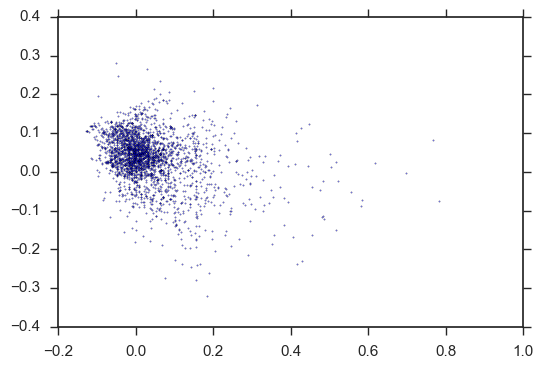

In [171]:
plt.scatter(D["error_width"], D["error_center"], s = 1.0, alpha=0.5 )
plt.show()

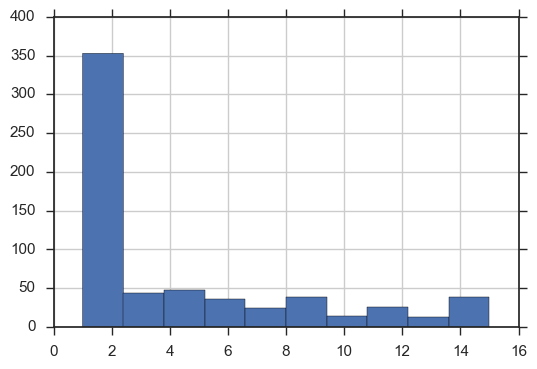

In [179]:
D.groupby("user_id")["error_width"].count().hist()

TypeError: invalid type promotion

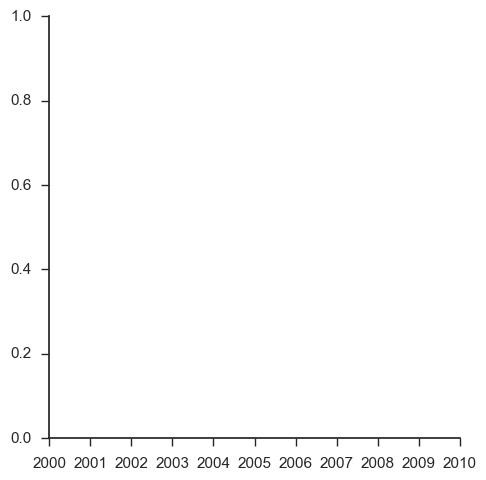

In [122]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('event_finished_at', 'real_width', data=D)

plt.xlabel('Time')
t.ylabel('Deaths')

In [234]:
ds
ticker = "4c0469d0-2569-46ae-902b-c7fbd4ae0cb1"
ds1t = ds[ds["ticker_id"] == ticker]

print(len(set(ds1t["event_finished_at"].values)))


ds1t_byu = ds1t.groupby("user_id")

15


In [187]:
user_mem = {}
for uid in ds.user_id.values:
    user_mem[uid] = []

In [201]:
dates = set(ds1t["event_finished_at"].values)

In [225]:
def update_user(uid, err):
    user_mem[uid].append(error)
    s = np.std(user_mem[uid])
    m = np.mean(user_mem[uid])
    return m, s

In [228]:
fout = open(dir+"res.csv", "wt")
i = 0
for cur_date in dates:
    print("Date", cur_date)
    ds1tdt = ds1t[ds1t["event_finished_at"] == cur_date]
    
    uids = set(ds1tdt["user_id"].values)
    for uid in uids:
        print("User", uid)
        userguess = ds1tdt[ds1tdt["user_id"] == uid]
        error = userguess["error_center"].values[0]
        mu, sigma = update_user(uid, error)
        fout.write("{0},{1},{2},{3},{4}\n".format(cur_date, uid, error, mu, sigma))
fout.close()

Date 2017-01-20T06:50:00.000000000
User f3fa5efb-6b6f-4882-873b-6e566eccf8e9
User ff987063-5af7-4cfc-a9f1-9733ddffbaf4
User b77eaa39-e419-4005-9f8f-867c598dfaec
User 5260f80f-c152-475c-81a3-987250c34f83
User 9df67b39-986d-4e5f-9423-2ffa98bd9c00
User a4be5b5c-a844-4f0b-b128-e147969c114c
User 6153c3b8-afaa-47e0-bb47-3816a85e9bc1
User c1f14dcf-74bd-498d-bf00-4a22454f4411
User e9bdacab-f2aa-4dc1-8e8c-a75df3a7e194
User 88306fcc-bb3c-4081-9482-91d00cf4cc48
User 9a1da3b0-d3d4-43d4-bb59-aa3704d03cce
User b141183c-1e5a-42f9-881c-145af1aeafcb
User 316b0a9f-ae59-4c40-b6c3-765e7d6d7a98
User e6815c04-84aa-4fed-9b8d-2299f502a030
User 0cff3079-f179-4356-ae93-05f779074a3d
User 5dbcd905-2b49-4cb2-bab6-952a1c1ffa10
User 57cfcc65-8d32-48e0-84ff-aa244f8da70b
User d158ce62-ced4-4808-8910-10589b5d6e28
User b4681aff-12ae-4641-a56a-c1664f90ab81
User ef03b397-b15d-4970-b363-1c965c35e8b1
User a87f84c8-9ed8-45bc-8585-44a2c8668c01
User 3d48e116-5939-472b-a951-3b2667db3dca
User e8d343e3-8def-49a1-a222-c05c9154eb24